# <font size="6" color="gray">Capítulo 9</font><br>

<font size="50" color="lighblue">Varios temas de aprendizaje profundo: <br> Técnicas de aprendizaje profundo para video
e inteligencia lingüística</font><br>

<font size="6" color="lighblue">Curso AI</font>


###Descripción del capítulo

#### *Objetivos del capítulo:*

* Construye y entrena redes neuronales convolucionales para la clasificación de imágenes.
* Redes neuronales convolucionales (CNN en inglés) para detectar patrones correlacionados localmente en imágenes.
* Construye y entrena redes neuronales recurrentes para el pronóstico de series temporales y el procesamiento del lenguaje natural.
* Breve descripción general del LSTM.
* AutoEncoders para reducción dimensional y extracción de características.
* Breve introducción a las redes generativas adversarias (GAN en inglés).

#### *Contenidos del capítulo:*

* Unidad 1. Modelo CNN
* **Unidad 2. RNN para modelado de datos secuenciales**
* Unidad 3. Red neuronal adversaria generativa (GAN) para crear imágenes inexistentes


## <font size="6" color="gray">Unidad 3.</font><br>

<font size="50" color="black">Red neuronal adversaria generativa para crear imágenes inexistentes</font> <br>

**3.1. Codificador automático**<br>
3.2. Acerca de las redes generativas adversarias (GAN)<br>
3.3. Ejercicio de redes generativas adversarias<br>

### Codificador automático

#### Acerca del codificador automático

* Antes de estudiar los mecanismos de GAN, es necesario aprender el codificador automático, que comprime y descomprime los datos de entrenamiento.
* Un codificador automático básico no puede generar datos nuevos, pero su mecanismo subyacente ayuda a comprender GAN.
* El principal objetivo de GAN es sintetizar los nuevos datos con la misma distribución que el conjunto de datos de entrenamiento.
* Dado que la forma original de GAN no necesita datos de etiquetas, se considera un tipo de aprendizaje no supervisado.
* La extensión GAN original puede verse como un método de aprendizaje supervisado y no supervisado.

* Se puede utilizar para "comprimir" los datos mediante reducción dimensional.
* Se compone de partes simétricas de codificación y decodificación.

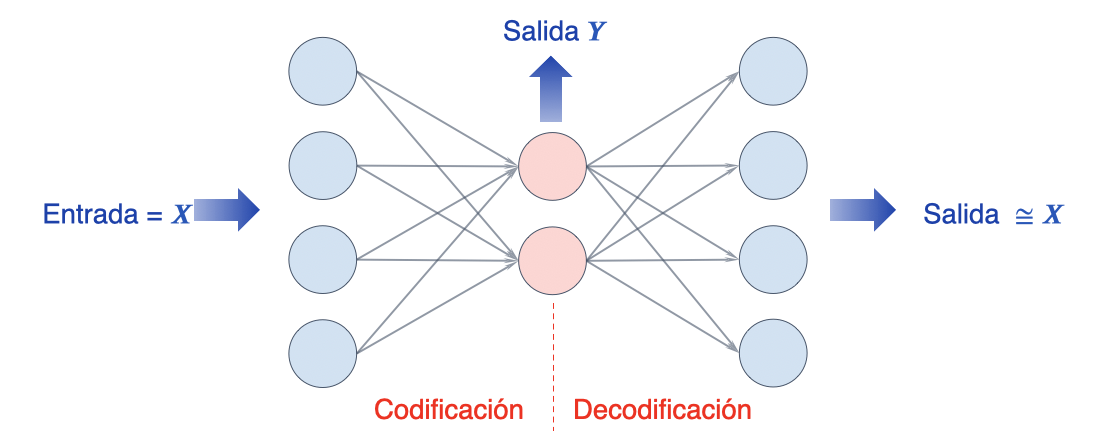


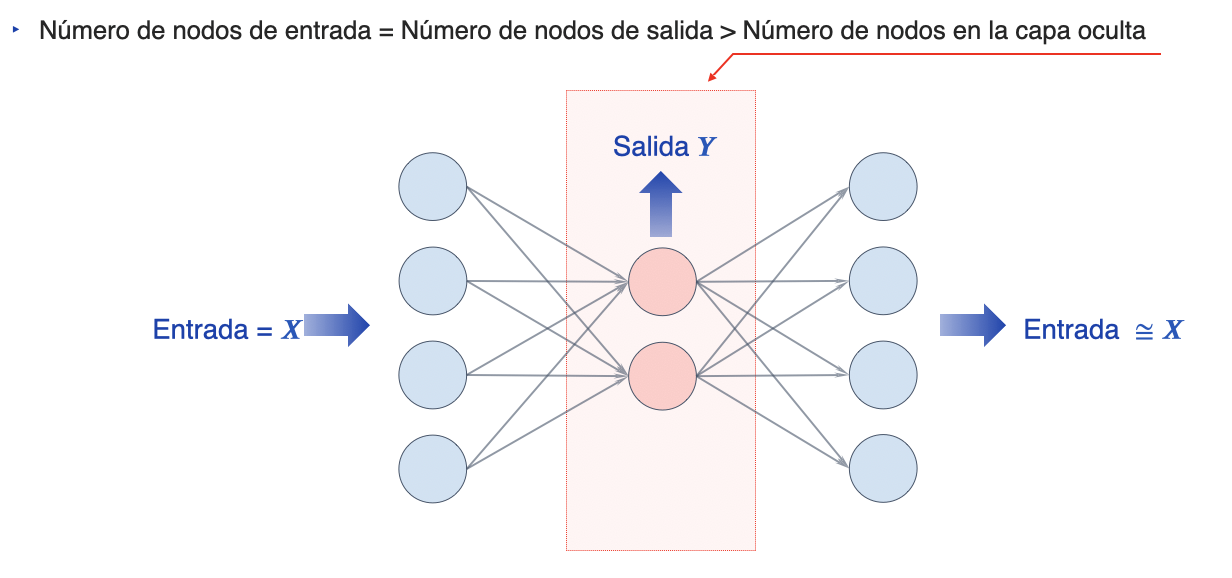

* La matriz de codificación de pesos $W_e$ y la matriz de pesos de decodificación $W_d$ pueden estar relacionadas: $W_d = W_e^T$

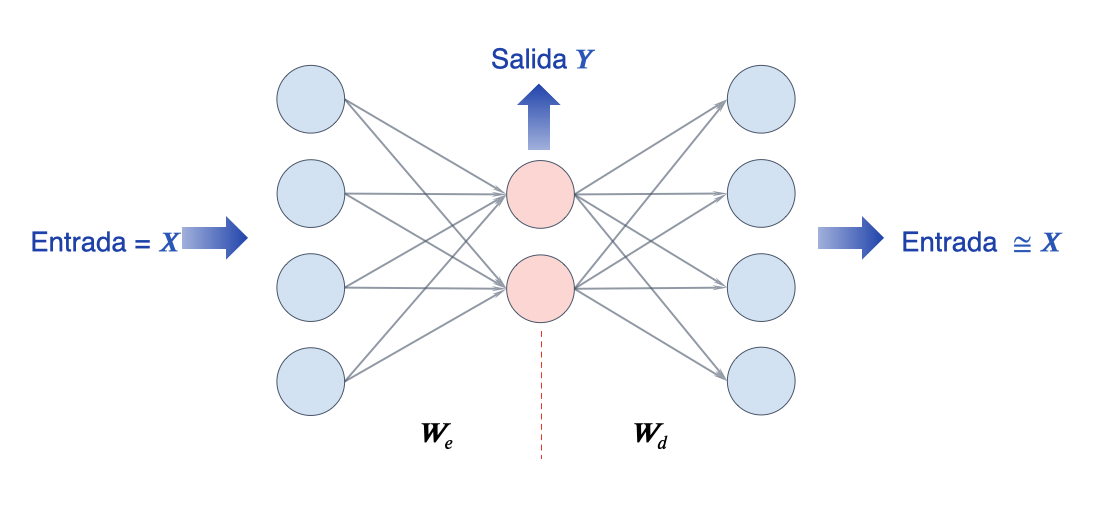

#### Examinemos de cerca la estructura del codificador automático una vez más.

* Un codificador automático se construye conectando dos redes neuronales, una red neuronal codificadora y una red neuronal decodificadora.

<font size="6">`Red neuronal codificadora`</font><br>
* La red neuronal codificadora codifica el vector z de dimensión p (es decir, $ z  \epsilon \mathbb{R}^p $), que recibe información del vector de características de entrada dimensional d relacionado con la muestra x (es decir, $ x  \epsilon \mathbb{R}^d $ ). En otras palabras, la función del codificador es aprender a modelar la función z = f(x).
* El vector codificado z se denomina vector latente o expresión de característica latente.
* Generalmente, la dimensión de un vector latente es menor que la de una muestra de entrada. Es decir, p < d.
Se puede decir que el codificador comprime datos.

<font size="6">`Red neuronal decodificadora`</font><br>
* El decodificador descomprime $\hat{x}$ del vector latente z de baja dimensión.
* El decodificador puede considerarse como una función $\hat{x} = g(z)$.


#### Examinemos de cerca la estructura del codificador automático una vez más.

* En esta figura, el codificador y el decodificador están compuestos por su propia capa completamente conectada.
* Se puede integrar un codificador automático sin una capa oculta (como las redes neuronales multicapa) en un codificador automático profundo insertando muchas capas ocultas no lineales.
* Luego, puede aprender funciones de compresión y reconstrucción de datos más efectivas.
* En esta sección, los codificadores automáticos utilizan capas completamente conectadas.
* Sin embargo, cuando utilice imágenes, puede utilizar capas convolucionales en lugar de capas completamente conectadas.

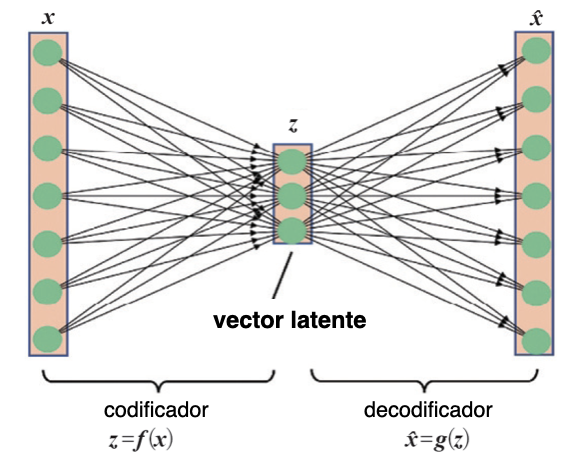

# **Ejercicio de codificación #0703a**

<font size="50" color="lighblue">ARCHIVO ex_0703a.ipynb</font>

**INSTRUCCIÓN DE PRÁCTICA**<br>
Inicia Jupyter Notebook.
En Jupyter Notebook, da clic en el archivo ex_0703a.ipynb en la carpeta Ejercicio de codificación.

## Ejercicio de codificación #0703a
### 1. Reducción dimensional con PCA:

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

# Ejecuta los códigos en TensorFlow 2.0 sin editar los de la versión 1.x (excepto el módulo contrib).

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

#### 1.1. Leer datos y preprocesar:


In [ ]:
# Leer datos.
data_raw = load_iris()
X = data_raw['data']
y = data_raw['target'].reshape(-1,1)

In [ ]:
# Escalamiento
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Convierte en un DataFrame y visualiza.
header = ['SepalLength','SepalWidth','PetalLength','PetalWidth']      # nombre de columnas
df = pd.DataFrame(X_scaled,columns=header)
df.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667


#### 1.2. Mostrar el resultado de PCA:

In [ ]:
# Reduce a 2 dimensiones.
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Convierte las etiquetas de números enteros en nombres de colores.
mycolor = []
for i in y:
    if i == 0:
        mycolor.append('red')
    elif i == 1:
        mycolor.append('green')
    else:
        mycolor.append('blue')

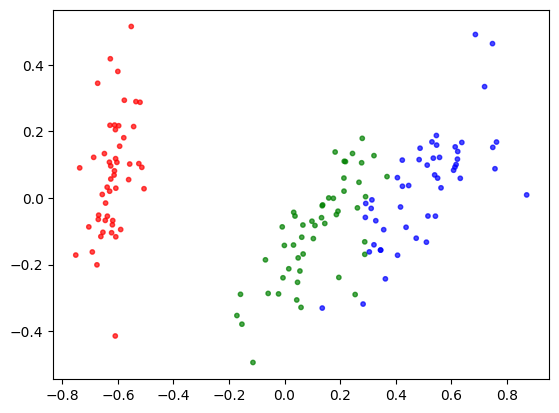

In [ ]:
# Visualiza
plt.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10, c=mycolor)
plt.show()

### 2. Reducción dimensional con AutoEncoder:
#### 2.1. Define un modelo de AutoEncoder:

In [ ]:
# Definición de hiperparámetros
n_input = 4             # Las capas de entrada tienen tantos nodos como variables.
n_hidden = 2            # El número de nodos en la capa oculta = 2 <= mi objetivo.
n_output = n_input      # La salida debe tener la misma cantidad de nodos que la entrada.
learn_rate = 0.0001
n_epochs = 10001

In [ ]:
# Definición de variables
initializer = tf.variance_scaling_initializer()
W1 = tf.Variable(initializer([n_input, n_hidden]), dtype=tf.float32)
W2 = tf.Variable(initializer([n_hidden, n_output]), dtype=tf.float32)
b1 = tf.Variable(tf.zeros(n_hidden))
b2 = tf.Variable(tf.zeros(n_output))

In [ ]:
W2

<tf.Variable 'Variable_1:0' shape=(2, 4) dtype=float32_ref>

In [ ]:
# Definición de marcador de posición
X_ph = tf.placeholder(tf.float32, shape=[None, n_input])

In [ ]:
X_ph

<tf.Tensor 'Placeholder:0' shape=(?, 4) dtype=float32>

In [ ]:
# Definición del modelo AutoEncoder
hidden_layer = tf.matmul(X_ph, W1) + b1                  # No activación.
y_model = tf.matmul(hidden_layer, W2) + b2
loss = tf.reduce_mean(tf.square(X_ph - y_model))         # 'X' ocupa el lugar de 'y'.
optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

#### 2.2. Entrenamiento de AutoEncoder:

In [ ]:
with tf.Session() as sess:
        sess.run(init)
        for i in range(n_epochs):
            my_feed = {X_ph:X_scaled}
            sess.run(train, feed_dict = my_feed)
            if i % 1000 == 0:
                mse = sess.run(loss, feed_dict = my_feed)
                print("Step : {}    ,   MSE  : {}".format(i, mse))
        X_auto = sess.run(hidden_layer, feed_dict = my_feed)       # ¡¡¡Obtén la representación dimensional reducida de la capa oculta!!!


Step : 0    ,    MSE : 0.2188754826784134
Step : 1000    ,    MSE : 0.09992057830095291
Step : 2000    ,    MSE : 0.05497235432267189
Step : 3000    ,    MSE : 0.03844214230775833
Step : 4000    ,    MSE : 0.029851948842406273
Step : 5000    ,    MSE : 0.023668158799409866
Step : 6000    ,    MSE : 0.01823074370622635
Step : 7000    ,    MSE : 0.013463451527059078
Step : 8000    ,    MSE : 0.009658951312303543
Step : 9000    ,    MSE : 0.007155504077672958
Step : 10000    ,    MSE : 0.005681986920535564


#### 2.3. Comparemos los resultados de PCA frente a AutoEncoder:

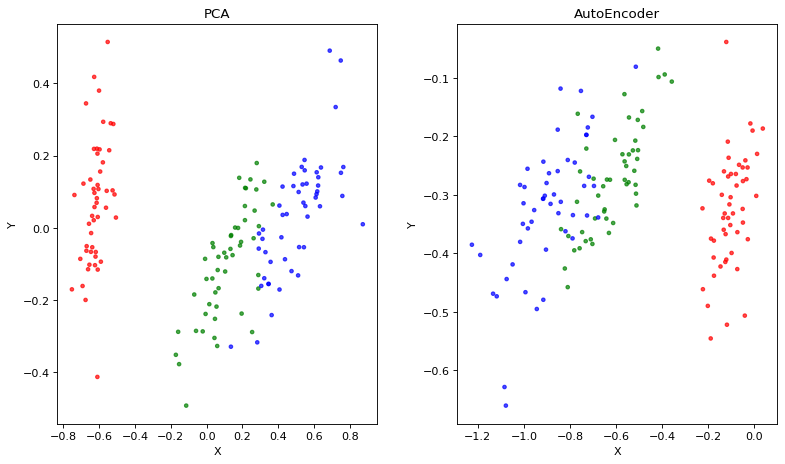

In [ ]:
fig=plt.figure(figsize=(10,5), dpi=80)       # tamaño de figura = (Ancho, Alto). Establecer DPI
axes1 = fig.add_axes([0,0,0.4,1])            # Izquierda, Abajo, Ancho, Alto
axes2 = fig.add_axes([0.5,0,0.4,1])          # Izquierda, Abajo, Ancho, Alto
axes1.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10, c=mycolor)
axes2.scatter(X_auto[:,0],X_auto[:,1],marker="o",alpha=0.7, s=10, c=mycolor)
axes1.set_xlabel('X')
axes1.set_ylabel('Y')
axes1.set_title('PCA')
axes2.set_xlabel('X')
axes2.set_ylabel('Y')
axes2.set_title('AutoEncoder')
plt.show()


Ahora probamos con la libreria de Keras, construyendo una red neuronal con Keras

In [ ]:
batch_size = 20
learn_rate = 0.0001
n_epochs = 10001

my_optimizer=Adam(learning_rate=learn_rate)
my_model.compile(loss = "MeanSquaredError", optimizer = my_optimizer)

my_summary = my_model.fit(X_scaled, X_scaled, epochs=1, batch_size = batch_size, verbose = 1)
my_model.summary()

8/8 [==============================] - 3s 55ms/step - loss: 0.1429
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 4)                 12        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
my_summary = my_model.fit(X_scaled, X_scaled, epochs=n_epochs, batch_size = batch_size, verbose = 1)

Epoch 1/10001
8/8 [==============================] - 0s 15ms/step - loss: 0.1429
Epoch 2/10001
8/8 [==============================] - 0s 16ms/step - loss: 0.1429
Epoch 3/10001
8/8 [==============================] - 0s 27ms/step - loss: 0.1429
Epoch 4/10001
8/8 [==============================] - 0s 24ms/step - loss: 0.1429
Epoch 5/10001
8/8 [==============================] - 0s 25ms/step - loss: 0.1429
Epoch 6/10001
8/8 [==============================] - 0s 25ms/step - loss: 0.1429
Epoch 7/10001
8/8 [==============================] - 0s 22ms/step - loss: 0.1429
Epoch 8/10001
8/8 [==============================] - 0s 19ms/step - loss: 0.1429
Epoch 9/10001
8/8 [==============================] - 0s 38ms/step - loss: 0.1429
Epoch 10/10001
8/8 [==============================] - 0s 31ms/step - loss: 0.1429
Epoch 11/10001
8/8 [==============================] - 0s 14ms/step - loss: 0.1429
Epoch 12/10001
8/8 [==============================] - 0s 11ms/step - loss: 0.1429
Epoch 13/10001
8/8 [=====

KeyboardInterrupt: 

In [ ]:
#my_model.predict(X_scaled)


from keras.models import Model


intermediate_layer_model = Model(inputs=my_model.input, outputs=my_model.get_layer("dense_1").output)
intermediate_output = intermediate_layer_model.predict(X_scaled)

print(intermediate_output)

5/5 [==============================] - 1s 12ms/step
[[2.34166473e-01 1.16297364e-01]
 [2.25014240e-01 3.02810162e-01]
 [1.37966543e-01 2.51649141e-01]
 [1.31756306e-01 3.22581619e-01]
 [1.94042832e-01 9.71763059e-02]
 [2.39938021e-01 3.23059596e-02]
 [9.37394500e-02 2.23171651e-01]
 [2.21155986e-01 1.74310982e-01]
 [8.53344202e-02 3.99851978e-01]
 [2.22405285e-01 2.73788780e-01]
 [2.52526075e-01 4.92652617e-02]
 [1.68021768e-01 2.13203475e-01]
 [1.95794210e-01 3.05964470e-01]
 [2.55570710e-02 3.32141578e-01]
 [2.16035083e-01 1.02661230e-04]
 [2.16035083e-01 1.02661230e-04]
 [2.16035083e-01 1.02661230e-04]
 [2.33419254e-01 1.26129851e-01]
 [2.53477484e-01 5.05470522e-02]
 [2.09750220e-01 4.27253321e-02]
 [3.32526684e-01 1.57046288e-01]
 [2.19159439e-01 8.46656933e-02]
 [4.69726473e-02 9.74476486e-02]
 [2.72638619e-01 2.48767436e-01]
 [1.88422620e-01 2.51960367e-01]
 [2.68582076e-01 3.15661341e-01]
 [2.26461828e-01 2.06894934e-01]
 [2.70934016e-01 1.16229549e-01]
 [2.74290204e-01 1.35418

In [ ]:
intermediate_output.shape

(150, 2)

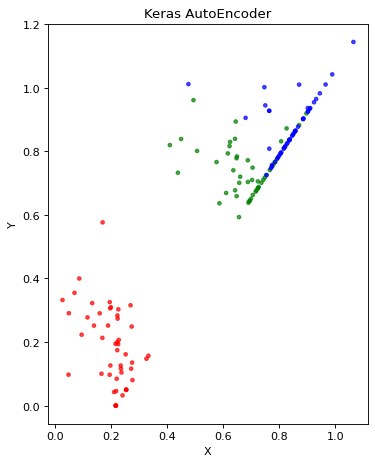

In [ ]:
fig=plt.figure(figsize=(10,5), dpi=80)       # tamaño de figura = (Ancho, Alto). Establecer DPI
axes1 = fig.add_axes([0,0,0.4,1])            # Izquierda, Abajo, Ancho, Alto

axes1.scatter(intermediate_output[:,0],intermediate_output[:,1],marker="o",alpha=0.7, s=10, c=mycolor)

axes1.set_xlabel('X')
axes1.set_ylabel('Y')
axes1.set_title('Keras AutoEncoder')

plt.show()

# **Ejercicio de codificación #0703b**

<font size="50" color="lighblue">ARCHIVO ex_0703b.ipynb</font>

**INSTRUCCIÓN DE PRÁCTICA**<br>
Inicia Jupyter Notebook.
En Jupyter Notebook, da clic en el archivo ex_0703b.ipynb en la carpeta Ejercicio de codificación.

<Font color = red>IMPORTANTE:</Font> **Se debe correr este código con `CPU` y no usar `GPU`**

### 1. PCA con AutoEncoder lineal:

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Importar el módulo común.
import numpy as np
import os

# Para mantener el resultado de la ejecución.
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Para mostrar un gráfico
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
# Para dibujar una imagen en blanco y negro
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [ ]:
# Conjunto de datos 3D
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [ ]:
# AutoEncoder
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

In [ ]:
autoencoder.compile(loss="mse", optimizer=keras.optimizers.legacy.SGD(learning_rate=1.5))

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
history = autoencoder.fit(X_train, X_train, epochs=20)
codings = encoder.predict(X_train)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


2/2 [==============================] - 0s 18ms/step - loss: 0.3580
Epoch 2/20
2/2 [==============================] - 0s 19ms/step - loss: 0.0799
Epoch 3/20
2/2 [==============================] - 0s 19ms/step - loss: 0.0727
Epoch 4/20
2/2 [==============================] - 0s 19ms/step - loss: 0.1367
Epoch 5/20
2/2 [==============================] - 0s 18ms/step - loss: 0.2917
Epoch 6/20
2/2 [==============================] - 0s 17ms/step - loss: 0.1167
Epoch 7/20
2/2 [==============================] - 0s 17ms/step - loss: 0.0414
Epoch 8/20
2/2 [==============================] - 0s 21ms/step - loss: 0.0358
Epoch 9/20
2/2 [==============================] - 0s 16ms/step - loss: 0.0266
Epoch 10/20
2/2 [==============================] - 0s 17ms/step - loss: 0.0192
Epoch 11/20
2/2 [==============================] - 0s 18ms/step - loss: 0.0131
Epoch 12/20
2/2 [==============================] - 0s 21ms/step - loss: 0.0096
Epoch 13/20
2/2 [==============================] - 0s 20ms/step - loss: 

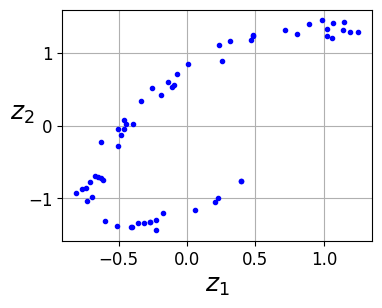

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

## <font size="6" color="gray">Unidad 3.</font><br>

<font size="50" color="black">Red neuronal adversaria generativa para crear imágenes inexistentes</font> <br>

3.1. Codificador automático<br>
**3.2. Acerca de las redes generativas adversarias (GAN)**<br>
3.3. Ejercicio de redes generativas adversarias<br>

### Redes generativas adversarias (GAN)

#### Acerca de las redes generativas adversarias (GAN)

* Can you distinguish the real pictures from the fake ones?

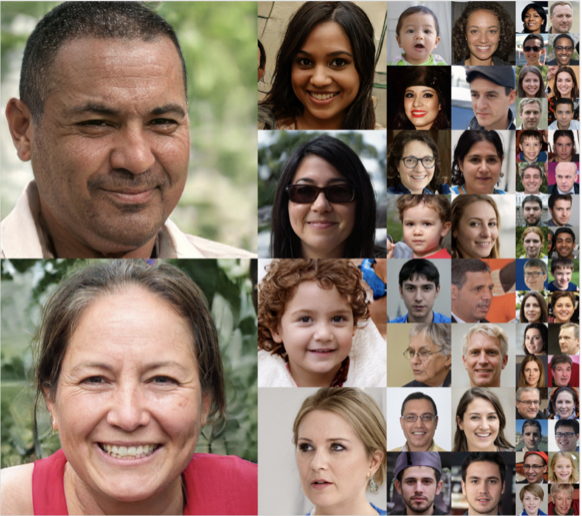

https://arxiv.org/abs/1812.04948

#### Modelo generativo para nuevos datos sintéticos.

* Autoencoder es el modelo definitivo.
* Una vez entrenado el codificador automático, puede reconstruir la entrada `x` a partir de su versión comprimida de baja dimensión.
* Aunque el codificador automático puede reconstruir una entrada transformando una expresión comprimida, no puede generar datos nuevos.
* Sin embargo, un modelo generativo (una expresión latente) puede generar una nueva muestra $\hat{x}$
 a partir del vector aleatorio `z`.
* El siguiente es un modelo generativo expresado en un diagrama.
* El vector aleatorio z es fácil de muestrear ya que se crea a partir de una distribución simple cuyas características se conocen perfectamente.
* Por ejemplo, puede muestrear cada unidad de z de una distribución uniforme de rango [-1, 1] (escrita como $z_i \sim U(-1,1) $) o de una distribución normal estándar (escrita como $z_i \sim \mathscr{N}(\mu=0, \sigma^2=1) $).

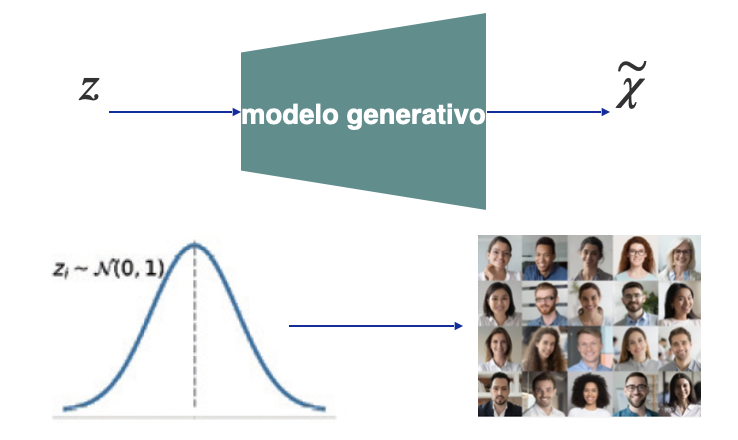

* Al observar el modelo generativo, puedes notar que el decodificador del codificador automático se parece a un modelo generativo.
* Ambos reciben el vector latente z como entrada y crean una salida en el espacio de x. $\hat{x}$  es una reconstrucción de la entrada x en el codificador automático, mientras que es una muestra sintética en un modelo generativo.
* La gran diferencia entre los dos modelos es que se desconoce la distribución de z en el codificador automático. Aún así, es perfectamente conocido en el modelo generativo.
* El codificador automático se puedes generalizar para convertirse en un modelo generativo.
* VAE es uno de los métodos para hacerlo.

* En VAE, una vez que recibe la muestra de entrada x, la red del codificador calcula la media μ y la varianza $\sigma^2$ de la distribución del vector latente.
* Mientras entrena VAE, modifica la red neuronal para que la media y la varianza (media cero, varianza unitaria) se ajusten a la distribución normal estándar.
* Después de entrenar el modelo VAE, separa el codificador y usa la red neuronal del decodificador para generar una nueva muestra $\hat{x}$ insertando un vector z, que se tomó como muestra aleatoria de una distribución Gaussiana.
* Existen otros modelos generativos como los modelos de flujo autorregresivo y normalizador.
* Recientemente, GAN ha sido la arquitectura de modelo generativo más popular en aprendizaje profundo.

#### Generando nueva muestra con GAN

* Supongamos una red neuronal generativa que genera una imagen de salida x a partir de un vector aleatorio de entrada z muestreado de una distribución conocida.
* Esto se llama generador (G) y $\hat{x} = G(z)$ es una salida generada.
* Entonces, supongamos que el objetivo del modelo es generar imágenes de caras, edificios, animales, números escritos a mano como MNIST, etc.

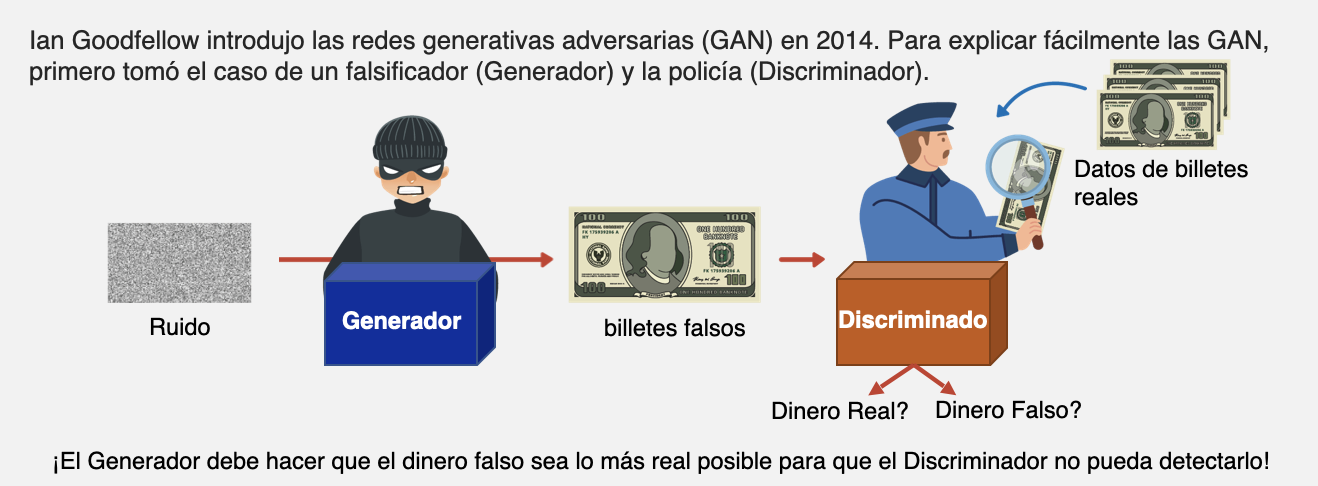

* Como siempre, inicializa la red neuronal con un valor de peso aleatorio.
* La imagen de salida es como ruido blanco cuando aún no se ha aprendido el peso.
* Supongamos una función que evalúa la calidad de una imagen (llamada función de evaluación).
* Para mejorar la calidad de la imagen generada, esta función puede enviar retroalimentación a la red neuronal para modificar el valor de peso.
* Asimismo, puede entrenar el generador basándose en los comentarios de la función de evaluación.
* El generador aprenderá a mejorar la salida para que se parezca a la imagen real.

* La función de evaluación mencionada anteriormente simplifica el proceso de generación de imágenes. La pregunta es: "¿Existe una función multiuso para evaluar la calidad de una imagen y, de ser así, cómo se puede definir?"
* Un ser humano puede evaluar una imagen de la salida de la red neuronal.
* Un resultado del cerebro no se puede propagar hacia atrás a la red neuronal (todavía).
* Si un cerebro humano puede evaluar la calidad de una imagen sintética, ¿podemos crear un modelo de red neuronal que realice una tarea similar?
* Esta es la idea central detrás de GAN.
* Como puedes ver a continuación, el modelo GAN está compuesto por otra red neuronal llamada discriminador (D).
* Discriminador es un clasificador que aprende a distinguir una imagen sintética $\hat{x}$ de una imagen real x.

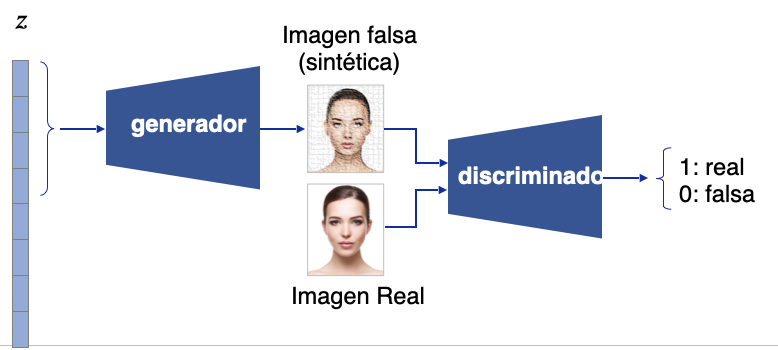

* En GAN, el generador y el discriminador se entrenan juntos.
* En primer lugar, después de inicializar el peso del modelo, el generador genera una imagen, a diferencia de la imagen real.
* Asimismo, el discriminador tiene poca capacidad para distinguir imágenes sintéticas falsas de imágenes reales.
* A medida que pasa el tiempo (es decir, mediante entrenamiento), las dos redes neuronales mejoran con la interacción mutua.
* Las dos redes neuronales ejecutan un juego de confrontación.
* El generador aprende cómo mejorar su salida para engañar al discriminador.
* El discriminador está entrenado para distinguir mejor imágenes sintéticas.

* La función objetivo de GAN en la tesis original es la siguiente:
<center>
$V(\theta^{(D)},\theta^{(G)})=\mathbb{E}_{x\sim P_{data} (x)} [log D(x)] + \mathbb{E}_{z\sim P_{z} (z)} [log [1 - D(G(z))]]$
</center>

* $V(\theta^{(D)},\theta^{(G)})$ se llama función de valor.
* Esto puede considerarse una compensación.
* Debes maximizar este valor para el discriminador (D) y minimizar este valor para el generador (G):

<center>
$→ min_G max_D V(\theta^{(D)},\theta^{(G)})$
</center>
                                         
* D(x) es una probabilidad que muestra si la muestra de entrada x es real o falsa.
* $\mathbb{E}_{x\sim P_{data} (x)} [log D(x)]$ muestra el valor esperado de la expresión entre paréntesis con respecto a la muestra de la distribución de datos (distribución de la muestra real).
* $\mathbb{E}_{z\sim P_{z} (z)} [log [1 - D(G(z))]]$ muestra el valor esperado de la expresión entre paréntesis con respecto al vector de entrada z.

#### Comprendiendo la función de pérdida de generador y discriminador en GAN

* Entrenar modelos GAN con dicha función de evaluación necesita dos pasos de optimización:<br>
 <font color=blue>(1)</font> Maximizar la compensación para el discriminador.<br>
 <font color=blue>(2)</font> Minimizar la compensación para el generador.<br><br>

* Un método práctico de entrenamiento GAN alterna estos dos pasos:<br>
 <font color=blue>(1)</font>  Fija el valor de peso de una red neuronal y optimiza el valor de peso de la otra.<br>
 <font color=blue>(2)</font>  Fija la segunda red neuronal y optimiza la primera.

* Repitelos en cada repetición de entrenamiento.
* Supongamos que está arreglando la red neuronal del generador y optimizando el discriminador.
* Ambos términos de la función de valor $V(\theta^{(D)},\theta^{(G)})$ contribuyen a la optimización del discriminador.
* El primer término es la pérdida relacionada con la muestra real.
* El segundo término es la pérdida relacionada con la muestra falsa.
* Si fijas G, la función objetivo sirve para maximizar $V(\theta^{(D)},\theta^{(G)})$.
* Es decir, hacer que el discriminador distinga mejor entre imágenes reales y falsas.

* Después de optimizar el discriminador utilizando la pérdida de las muestras reales y falsas, fije el discriminador y optimice el generador.
* En este caso, sólo el segundo término de $V(\theta^{(D)},\theta^{(G)})$ contribuye al gradiente del generador.
* Cuando D es fijo, la función objetivo que minimiza $V(\theta^{(D)},\theta^{(G)})$ se puede escribir como $min_G \mathbb{E}_{z\sim P_{z} (z)} [log [1 - D(G(z))]]$.
* Según la tesis GAN de Goodfellow, la función $log [1 - D(G(z))]$ presenta un problema de pérdida de gradiente en el proceso de entrenamiento inicial.
* Por lo tanto, en la fase inicial, la salida G(z) no parece una muestra real.
* Es seguro que D(G(z)) se aproximará a 0.
* Este fenómeno se llama saturación.


```
Para resolver tal problema, puede escribir la función objetivo destinada a
Minimización como
```
<center>
$min_G \mathbb{E}_{z\sim P_{z} (z)} [log [1 - D(G(z))]]$ como $max_G \mathbb{E}_{z\sim P_{z} (z)} [log [D(G(z))]]$
</center>

* Modificar la expresión como tal significa intercambiar las imágenes de muestras reales y falsas durante el entrenamiento del generador y encontrar el valor mínimo de la función general. En otras palabras, <font color = blue> es el cambio de etiqueta a 1 aunque sea 0 porque la muestra sintética es falsa.</font>

```
Entonces, en lugar de maximizar,
```
<center>
$max_G \mathbb{E}_{z\sim P_{z} (z)} [log [D(G(z))]]$, </center>

```
puedes minimizar la pérdida de entropía cruzada binaria con la nueva etiqueta.
```


* Aquí presentamos el proceso de optimización general para el entrenamiento de GAN.
* Veamos etiquetas de datos que se pueden utilizar para el entrenamiento de GAN.
* Puede utilizar la función de pérdida de entropía cruzada binaria si el discriminador es un clasificador binario (es decir, la etiqueta de clase para imágenes falsas y reales es 0 y 1).
* Una etiqueta de respuesta para la pérdida del discriminador se puede discernir de la siguiente manera:

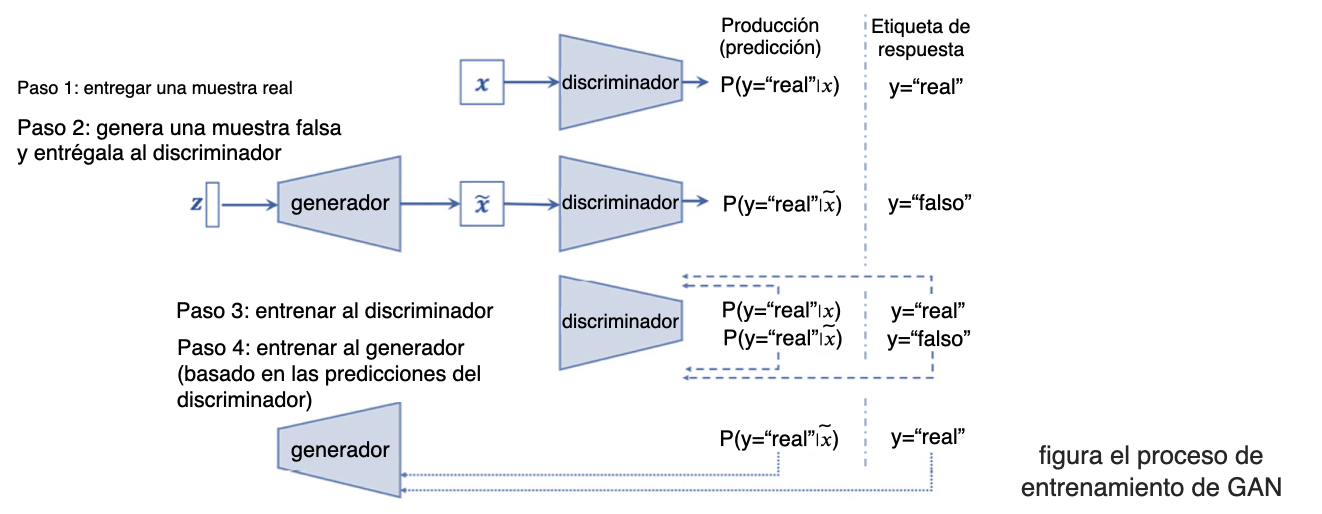

* ¿Cuál es la etiqueta para entrenar el generador?
* Si el discriminador no clasifica la salida del generador como real, se puede imponer una penalización al generador ya que tiene que generar imágenes reales.
* Al calcular la función de pérdida del generador, se supone que la etiqueta de la salida del generador es 1.